In [21]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from PIL import Image
import matplotlib.pyplot as plt

# To make nice plots
!pip install six
!pip install pydotplus
!pip install graphviz
from sklearn.tree import export_graphviz
from sklearn import metrics
from six import StringIO
import pydotplus

You should consider upgrading via the 'c:\users\vio_g\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\vio_g\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\vio_g\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Pre-Processing data

Get Dataset

In [22]:
collabs_dropped_path = r'/content/drive/MyDrive/Colab Notebooks/DS/2015_cleaned_droppedNaN.csv'
collabs_imputed_path = r'/content/drive/MyDrive/Colab Notebooks/DS/2015_cleaned_imputedNaN.csv'
# Note: if you use the dataset with imputed NaN values, the features BMI and AgeGroup are already scaled.

# Path to dataset with dropped NaN values
local_dropped_path = r'../../data/2015_cleaned_droppedNaN.csv'
# Path to dataset with imputed NaN values
local_imputed_path = '../../data/2015_cleaned_imputedNaN.csv'
df = pd.read_csv(local_imputed_path)

In [23]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,SexIsMale,AgeGroup
0,0.0,1.0,1.0,0.320255,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667
1,0.0,0.0,0.0,0.148641,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.500000
2,0.0,1.0,1.0,0.183896,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667
3,0.0,0.0,0.0,0.140453,0.0,0.0,0.0,0.4,1.0,0.0,0.0,0.666667
4,0.0,1.0,0.0,0.164904,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.833333


In [24]:
df.shape

(437514, 12)

**Check empty values**

In [25]:
print(round((((df.isnull().sum()).sum() / np.product(df.shape)) * 100), 2))

0.0


We reduce the database for testing purposes

In [26]:
df = df.loc[0:2500]
df.shape

(2501, 12)

In [27]:
X = df.drop(columns=['HeartDiseaseorAttack'])
y = np.array(df['HeartDiseaseorAttack'])

**Balance Data**

We performed undersampling because our target is not balanced.

In [28]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [30]:
y_train.shape

(574,)

In [31]:
X_train.shape

(574, 11)

# Gini vs Entropy

In this section we analyze if the method to calculate impurities (gini or entropy) affects the accuracy score.

In [32]:
gini_scores  = []
entropy_scores = []

for i in range (0, 100): 
  gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)
  entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

  gini_model.fit(X_train, y_train)
  entropy_model.fit(X_train, y_train)

  gini_predictions = gini_model.predict(X_test)
  entropy_prediction = entropy_model.predict(X_test)

  gini_scores.append(accuracy_score(y_test, gini_predictions))
  entropy_scores.append(accuracy_score(y_test, entropy_prediction))

avg_scores_gini = sum(gini_scores) / len(gini_scores)
avg_scores_entropy = sum(entropy_scores) / len(entropy_scores)

print(f"Average accuracy score for gini {avg_scores_gini}")
print(f"Average accuracy score for entropy {avg_scores_entropy}")

Average accuracy score for gini 0.541666666666666
Average accuracy score for entropy 0.5763888888888876


In [33]:
print("Statistical Analysis for gini")

gini_statistics = pd.Series(gini_scores)
gini_statistics.describe()

Statistical Analysis for gini


count    100.000000
mean       0.541667
std        0.000000
min        0.541667
25%        0.541667
50%        0.541667
75%        0.541667
max        0.541667
dtype: float64

In [34]:
print("Statistical Analysis for entropy")

entropy_statistics = pd.Series(entropy_scores)
entropy_statistics.describe()

Statistical Analysis for entropy


count    100.000000
mean       0.576389
std        0.000000
min        0.576389
25%        0.576389
50%        0.576389
75%        0.576389
max        0.576389
dtype: float64

Tree plot for gini

InvocationException: GraphViz's executables not found

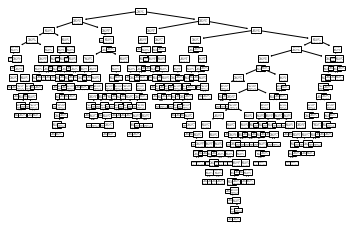

In [35]:
tree.plot_tree(gini_model)
dot_data = StringIO()

# For label correctly the data in the nodes: 
column_names = []
for column in X: 
  column_names.append(column)
clases_names = []
for c in gini_model.classes_:
  clases_names.append(str(c))


export_graphviz(gini_model ,out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, class_names=clases_names, feature_names=column_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree_gini_not_optimized.png")

Tree plot for entropy

InvocationException: GraphViz's executables not found

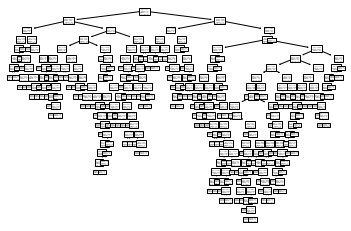

In [36]:
tree.plot_tree(entropy_model)
dot_data = StringIO()

# For label correctly the data in the nodes: 
clases_names = []
for c in entropy_model.classes_:
  clases_names.append(str(c))

export_graphviz(entropy_model ,out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, class_names=clases_names, feature_names=column_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree_entropy_not_optimized.png")

**Conclusion**

Entropy seems to have a better performance for this particular dataset. However, the gini criterion is faster because it is less computationally expensive. With a really big dataset (like our dataset) it might not be worth the time invested in training when using the entropy criterion. 

Moreover both trees seem overfitted, therefore we will analyze pruning in the next section. 

# Pruning the tree

Pruning means limiting the growth of a tree with the purpose of avoiding overfitting. 

Decision-trees classifiers in sklearn use the following parameters for pruning: 
* max_depth
* max_leaf_nodes
* min_samples_split
* min_samples_leaf
* min_impurity_decrease

For our tree, we will directly use ccp (cost complexity pruning), which is a post-pruning technique. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. 

The higher alpha is, the more the tree is prunned. An alpha of 0 will not preformed prunning (will leave just a node in the tree). 

In [37]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)

We create a list of alpha values to be tested in the tree model. 

In [38]:
ccp_alphas = np.arange(0, 0.5, 0.02)
print("Alpha list is") 
print(ccp_alphas)

Alpha list is
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48]


In [39]:
model_alphas = []
for alpha in ccp_alphas: 
  model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
  model.fit(X_train, y_train)
  model_alphas.append(model)

Now I graph the accuracy of each tree using the Training Dataset and the Testing Dataset as a function of alpha. 

The blue line is the accuracy for the training dataset. 
The yellow line is the accuracy for the test dataset. 

As we prune (alpha gets bigger) we see that the trainig accuracy decreases but the accuracy of testing increase. 

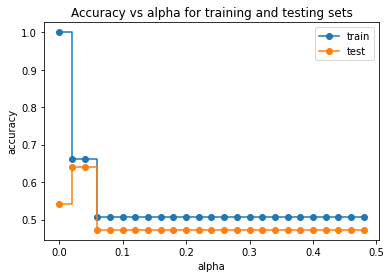

In [40]:
train_scores = [model.score(X_train, y_train) for model in model_alphas]
test_scores = [model.score(X_test, y_test) for model in model_alphas]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

From previous testing, we know that the optimal value of alpha must be around 0.025. We updated the list ccp_alphas and we will try to find a good value for alpha using cross validation.

In [41]:
ccp_alphas = np.arange(0, 0.09, 0.002)
print("Alpha list is") 
print(ccp_alphas)

Alpha list is
[0.    0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022
 0.024 0.026 0.028 0.03  0.032 0.034 0.036 0.038 0.04  0.042 0.044 0.046
 0.048 0.05  0.052 0.054 0.056 0.058 0.06  0.062 0.064 0.066 0.068 0.07
 0.072 0.074 0.076 0.078 0.08  0.082 0.084 0.086 0.088]


In [42]:
from sklearn.model_selection import cross_val_score
stat_values = []
for alpha in ccp_alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
  scores = cross_val_score(model, X_train, y_train, cv=5)
  stat_values.append([alpha, np.mean(scores), np.std(scores)])

Now we draw a graph for the means and standard deviation of the accuracy scores calculated for each candidate. 

<AxesSubplot:xlabel='alpha'>

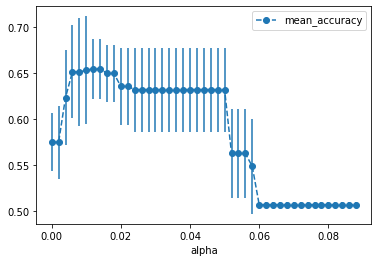

In [43]:
alpha_results = pd.DataFrame(stat_values, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x = 'alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [44]:
print("Alpha Results are")
alpha_results

Alpha Results are


,alpha,mean_accuracy,std
0,0.000,0.574935,0.031461
1,0.002,0.574950,0.039786
2,0.004,0.623677,0.051229
3,0.006,0.651503,0.050586
4,0.008,0.651548,0.059082
5,0.010,0.653303,0.058853
6,0.012,0.655042,0.032438
7,0.014,0.655042,0.032438
8,0.016,0.649825,0.031294
9,0.018,0.649825,0.031294


We could repeat the operation for a value of alpha betwwen 0.001 and 0.0025. But since the accuracy does not seem to increase that much, we have decided assign 0.002 to alpha. 

In [45]:
max_index = alpha_results['mean_accuracy'].idxmax()
ideal_ccp_alpha = alpha_results['alpha'][max_index]
print(f"The ideal value of alpha is {ideal_ccp_alpha}")

The ideal value of alpha is 0.012


# Build and evaluate classification tree

In [46]:
scores = []
for i in range(0, 100):
  model_pruned = DecisionTreeClassifier(criterion='gini', ccp_alpha=ideal_ccp_alpha, random_state=42)
  model_pruned.fit(X_train, y_train)
  predictions = model_pruned.predict(X_test)
  scores.append(accuracy_score(y_test, predictions))
average_score = sum(scores) / len(scores)
print(f'average score is {average_score} and its statistic is: ')
print('difference between max and mit value is ', max(scores) - min(scores))
scores = pd.Series(scores)
print(scores.describe())


average score is 0.6180555555555567 and its statistic is: 
difference between max and mit value is  0.0
count    1.000000e+02
mean     6.180556e-01
std      1.115816e-16
min      6.180556e-01
25%      6.180556e-01
50%      6.180556e-01
75%      6.180556e-01
max      6.180556e-01
dtype: float64


c:\users\vio_g\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


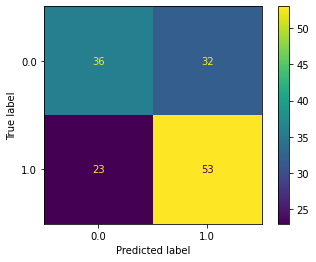

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_pruned, X_test, y_test)

In [48]:
dot_data = StringIO()
print(column_names)
export_graphviz(model_pruned ,out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, class_names=clases_names, feature_names=column_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree_optimized_prunning.png")
tree.plot_tree(model_pruned)

['HighBP', 'HighChol', 'BMI', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'SexIsMale', 'AgeGroup']


InvocationException: GraphViz's executables not found